# **Датасет об анализе бриллиантов**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
df = sns.load_dataset('diamonds') 

In [ ]:
df.shape

(53940, 10)

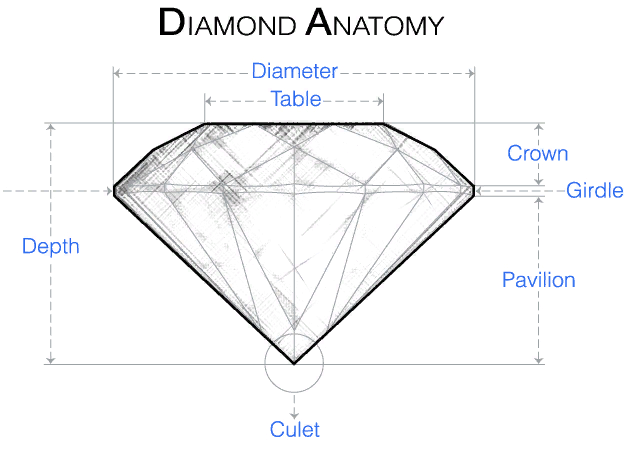

В 10 столбцах представлены следующие параметры
Числовые показатели: 

*   Carat(карат) - мера веса драгоценных камней
*   Cut(огранка) - виды огранки
*   Depth(глубина) - процент глубины измеряет отношение глубины камня к общему диаметру бриллианта (2 z / (x + y) 100%)
*   Table - это отношение ширины верхней грани бриллианта к ширине всего камня
*   Clarity(чистота) - подразумевается наличие наружных или внутренних дефектов
*   Pric(цена)  
*   Color(цвет)
* x - длина камня в миллиметрах
*  y - ширина камня в миллиметрах
* z - высота камня в миллиметрах














In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Проверка, существуют ли пробелы в данном датасете

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Проверим, наличие дупликатов в датасете и удалим их

In [ ]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [68]:
df = df.drop_duplicates()
df.shape

(53794, 10)

In [69]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Для нашего анализа мы не будем использовать параметры X, Y, Z, потому что уже существует параметр carat - это масса,т.е. масса = плотность * объём. Плотность мы можем принять за константу, значит 

**carat = const * x* y* z**


In [ ]:
df.drop(columns=['x', 'y', 'z'], inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Заметим, что среднее значени глубины **61.7** практически совпадает со значением 50% квантиля - **61.8**
То же самое можно заметить и для table, carat. Их средние значения тоде почти совпадают со значением квантиля порядка 0.5.


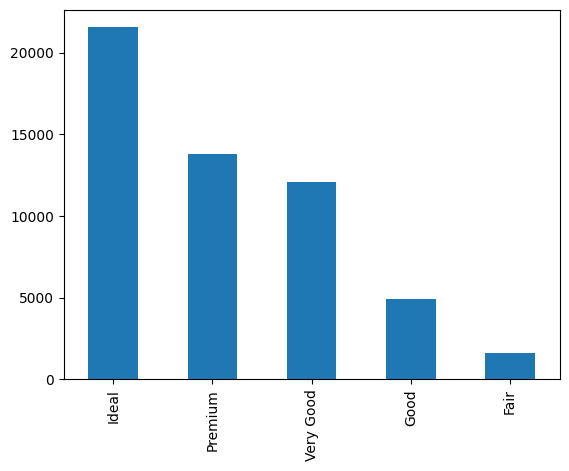

In [ ]:
df["cut"].value_counts().plot(kind="bar")
plt.show()

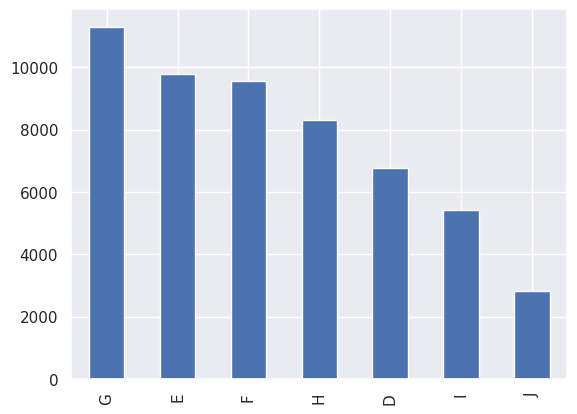

In [67]:
df["color"].value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='price', ylabel='clarity'>

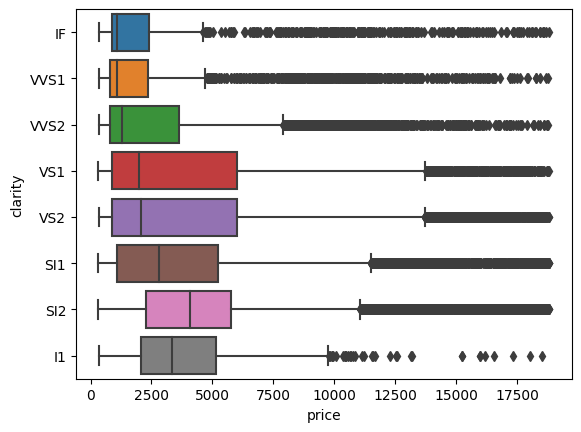

In [ ]:
sns.boxplot(df, x = 'price', y = 'clarity')

# Визуальный анализ

Построим гистограммы таких признаков, как price, table, depth, carat из датасета. Поверх них нарисуем функции плотностей для нормальных распределений с соответствующими параметрами.

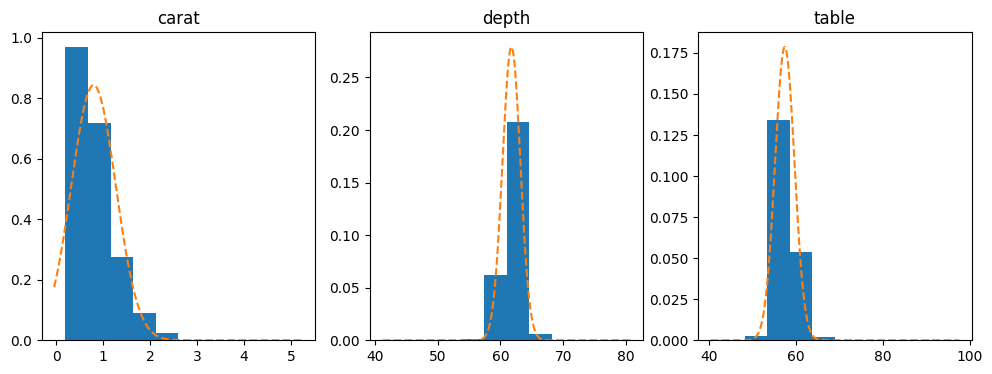

In [ ]:
keys = ['carat', 'depth', 'table']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Заметим, что распределения depth и table относительно нормальные. Распределение carat сильнее отличается от нормального 

 Другой способ графически оценить нормальность выборки — Q-Q кривая (или кривая квантиль-квантиль):

По данной выборке считаем выборочные среднее  a  и среднее квадратическое отклонение  σ .
Для каждого значения  α∈(0,1)  откладываем по оси  x  квантиль порядка  α  для нормального распределения с параметрами  a ,  σ , а по оси  y  — выборочный квантиль порядка  α .
Чем ближке график к графику y = x , тем более нормальным является распределение значений выборки.

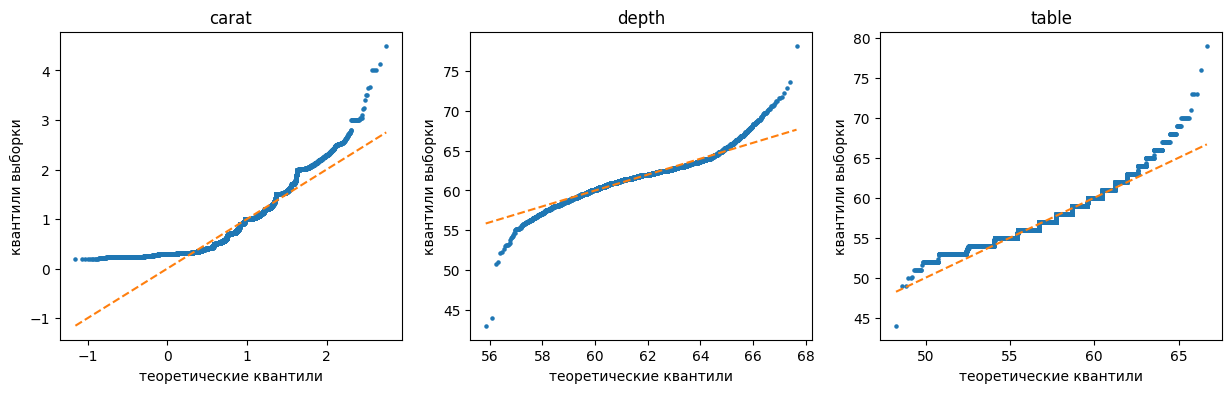

In [ ]:
fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(5 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color = 'C1', linestyle = 'dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Как мы видим, распределение **carat** в районе 0.5 - 1.5 напоминает нормальное, минусового значения масса не может принимать, а при > 1.5 заметны выбросы.
График **depth** можно считать относительно нормальным
Для распределения **table** уже гораздо больше выбросов 

## **Стастические показатели для выборок**

Вероятность попасть в интервал
от μ−σ до μ+σ равна 0.68 ,
В интервал от μ−2σ до μ+2σ — 0.95 ,
В интервал от μ−3σ до μ+3σ — 0.997 .

Оценим нормальность выборок. Вероятность попадания в интервалы для depth действительно схожи с теоретическими значениями. Значим, это распределение уже почти точно нормальное. 
Для других же параметров вероятность разнится сильнее.

In [ ]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

carat
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7090841675936226
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9551909529106415
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9918613274008157

depth
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7472747497219132
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9477196885428254
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9873007044864665

table
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6477567667779014
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9528179458657768
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9937708565072303

price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.85697070819429
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9346125324434557
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9776418242491658



## Регрессия между характеристиками 'price' и 'carat'?

Text(0, 0.5, 'Цена')

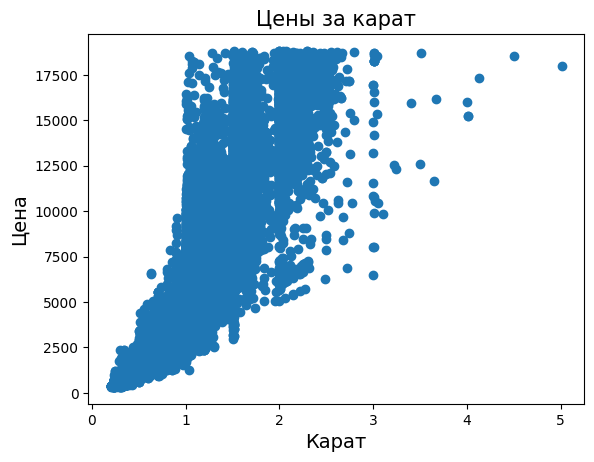

In [ ]:
plt.scatter(df['carat'], df['price'])
plt.title("Цены за карат", fontsize = 15)
plt.xlabel("Карат", fontsize = 14)
plt.ylabel("Цена", fontsize = 14)

Построим график зависимости цены от карат бриллианта, при этом покрасим точки в зависимости от характеристики чистоты. Мы видим, что самые чистые бриллианты с самым большим количеством карат - самые дорогие. Аналогично, мы видим, что бриллианты, отличающиеся непрозрачностью, гораздо дешевле, а дорогостоящие - выбросы

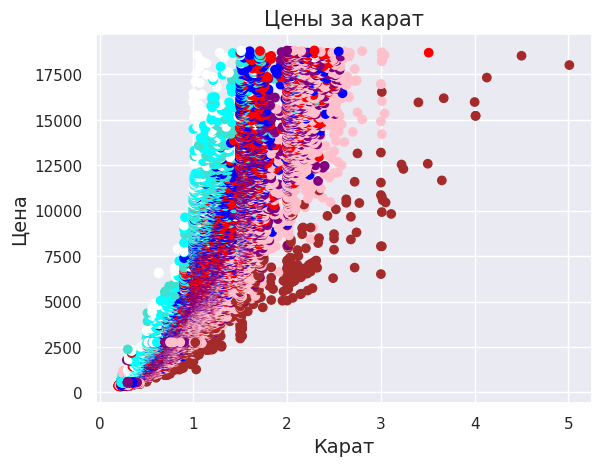

In [83]:
colors = ["white", "cyan", "turquoise", "blue", "red", "purple", "pink", "brown"]
dat_clar = df.groupby('clarity').grouper.group_info[0].tolist()
plt.scatter(df['carat'], df['price'], c = [colors[x] for x in dat_clar])
plt.title("Цены за карат", fontsize = 15)
plt.xlabel("Карат", fontsize = 14)
plt.ylabel("Цена", fontsize = 14)
plt.show()

Мы видим, что пара характеристик "карат-цена" прямо пропорциональна: по мере увеличения количества каратов у нас есть подтверждение того, что цена легко увеличивается.

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
x = np.array(df['carat'].tolist()).reshape(-1, 1)
y = df['price'].tolist()
model.fit(x, y)

LinearRegression()

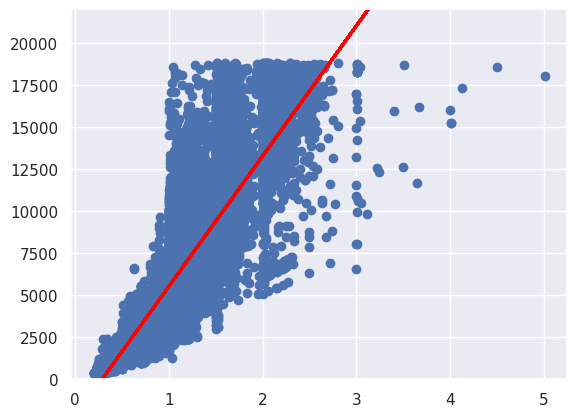

In [66]:
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,22000))
plt.show()

Линейной регрессии для depth не наблюдается

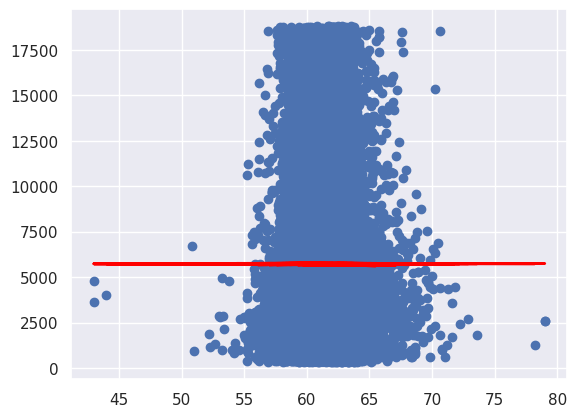

In [54]:
x2 = np.array(df['depth'].tolist()).reshape(-1, 1)
y2 = df['price'].tolist()
model.fit(x2, y2)
y2_pred = model.predict(x)
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='red', linewidth=2);
plt.show()

## Зависимости и проверка утверждений
Проверим, есть ли зависимость между каратом и ценой алмаза. Квантиль 50% для карата = 0.7. Разделим датасет на две выборки: со значением карата ниже и выше. Численный анализ показывает, что связь существует

In [ ]:
def var_analyze(df, df1, df2, key):
    n1 = df1.shape[0]
    n2 = df2.shape[0]
    res1_mean = df1[key].mean()
    res2_mean = df2[key].mean()
    res_mean = df[key].mean()

    ss_b = n1*(res1_mean - res_mean)**2 + n2*(res2_mean - res_mean)**2 #сумма квадратов регрессии
    ss_w = ((df1[key] - res1_mean)**2).sum() + ((df2[key] - res2_mean)**2).sum() #сумма квадратов ошибков

    k = 2
    n = n1 + n2
    k1 = k - 1
    k2 = n - k
    sigma2_b = ss_b / k1
    sigma2_w = ss_w / k2

    F = sigma2_b / sigma2_w

    alpha = 0.05
    t = stats.f.ppf(1 - alpha, k1, k2)
    return F>t

In [ ]:
df1 = df[df['carat'] <= 0.7]
df2 = df[df['carat'] > 0.7]
var_analyze(df, df1, df2, 'price')

True

Проверим, есть ли зависимость между прозрачностью и ценой алмаза.  Разделим датасет на две выборки: с хорошимим показателями прозрачности и нет. Численный анализ показывает, что связь существует

In [80]:
df1 = df[(df['clarity'] == 'IF') | (df['clarity'] =='WS1') | (df['clarity'] =='WS2') | (df['clarity'] =='VS1')]
df2 = df[(df['clarity'] != 'IF') & (df['clarity'] !='WS1') & (df['clarity'] !='WS2') & (df['clarity'] !='VS1')]
var_analyze(df, df1, df2, 'price')

True

## Что влияет на цену алмаза?

По таблице корреляции явно видно, что depth и table не влияют на цену. Их показатели корреляции - 0.

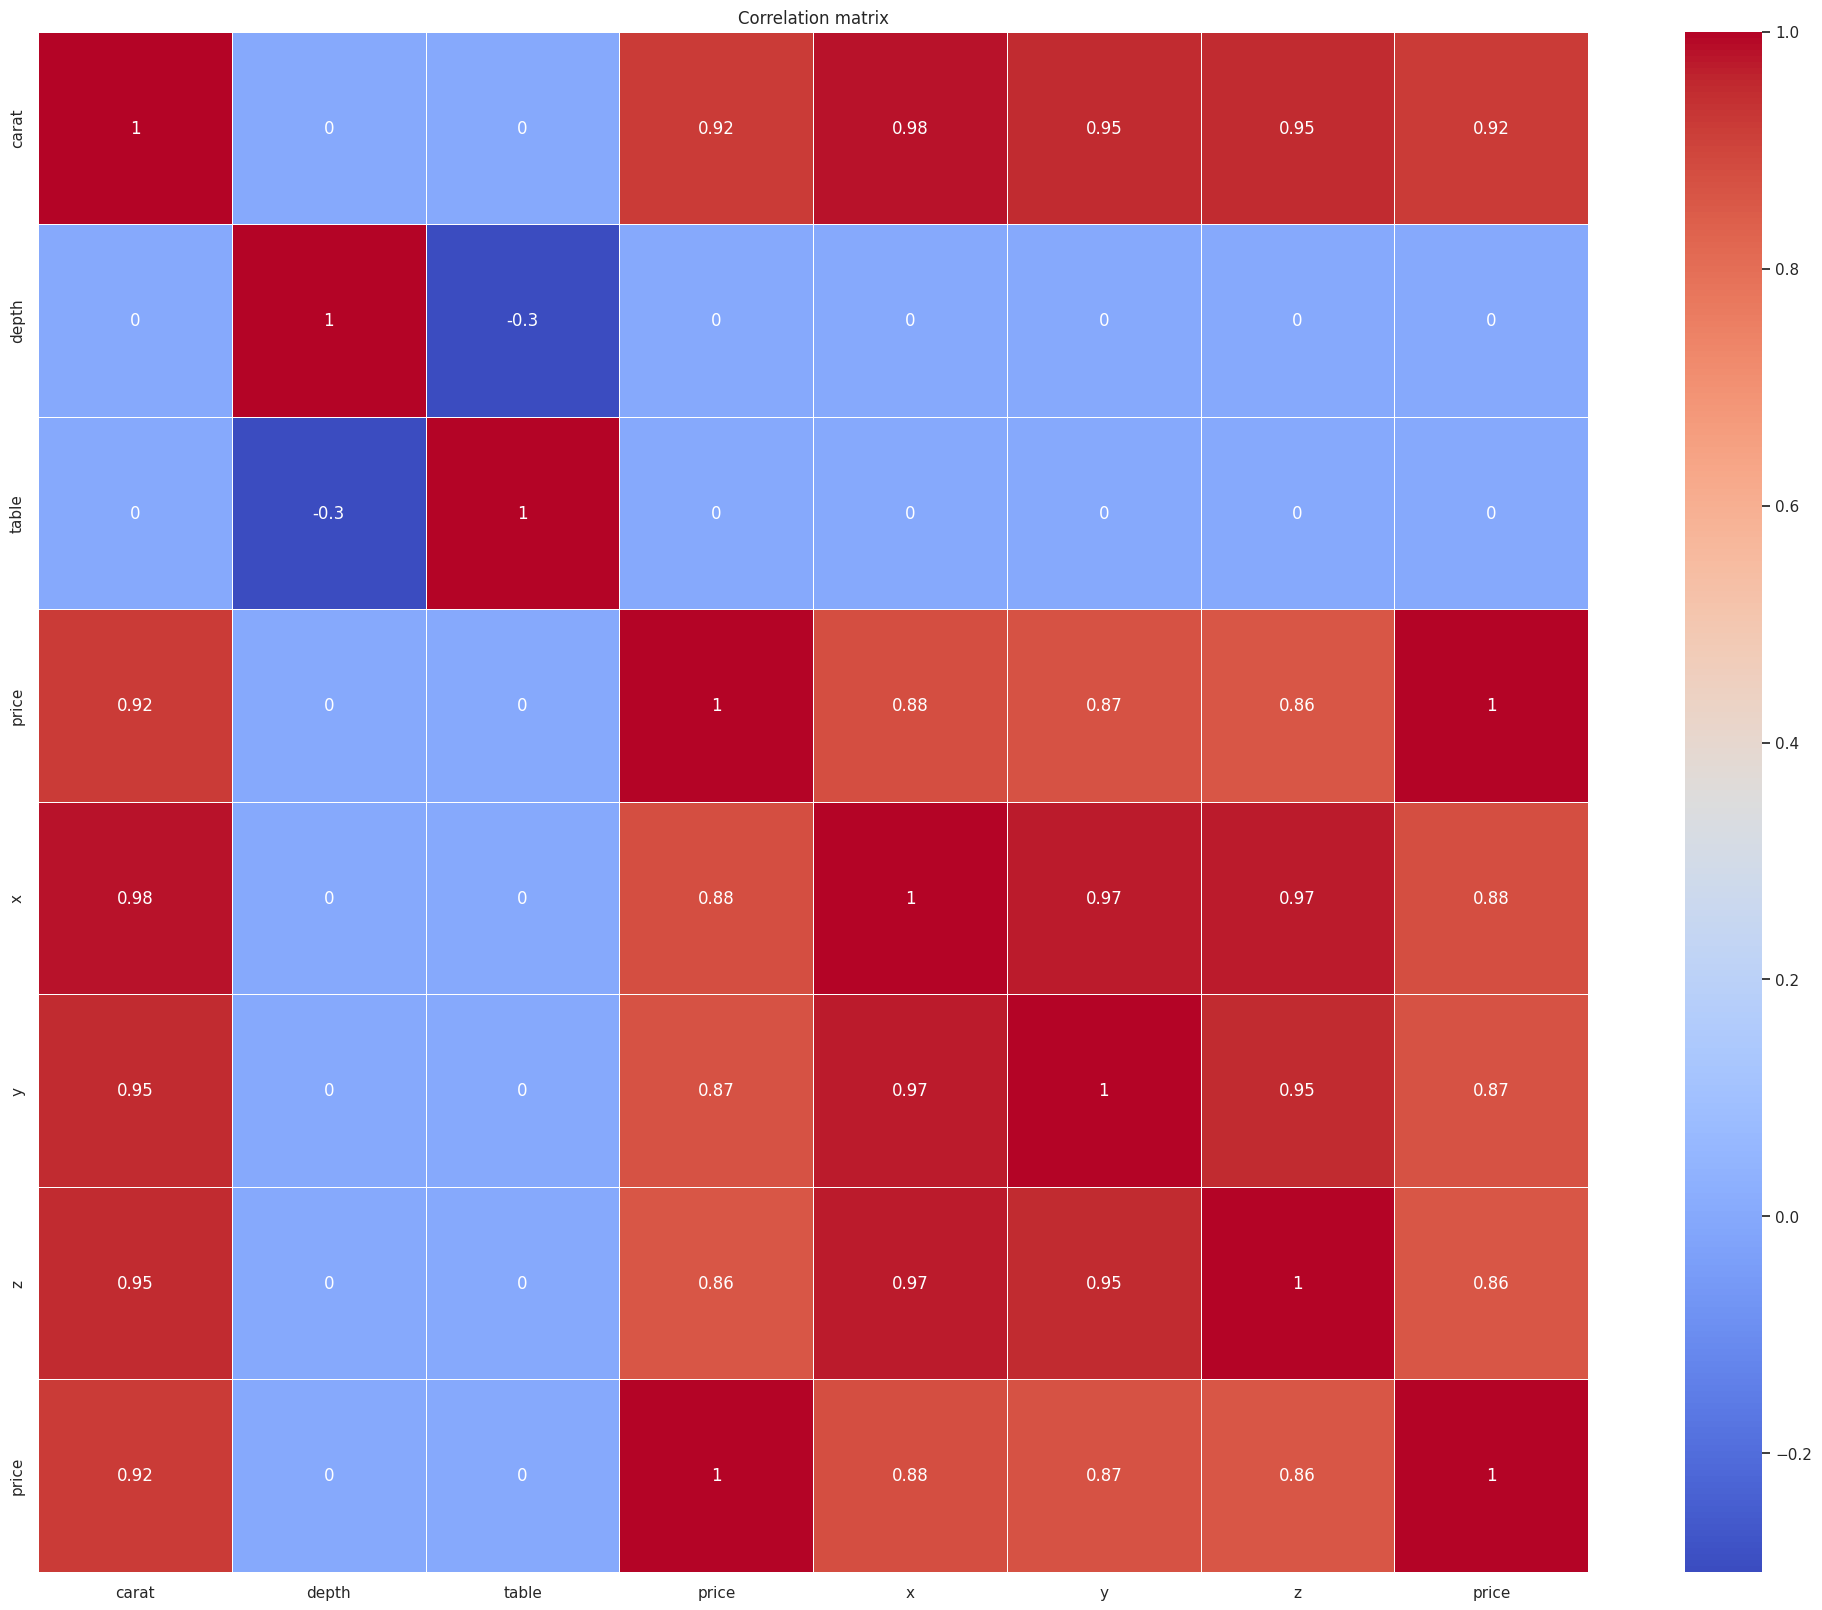

In [ ]:
seperated_genres = df['price']
dataset_with_genres = pd.concat([df, seperated_genres], axis = 1, sort = False)
list_of_genres = df['price']
plt.figure(figsize = (25,20))
sns.set(font_scale=1)
''
corr_matrix = dataset_with_genres.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Построим более понятную матрицу корреляции, не квадратную, а прямоугольную.

<Axes: >

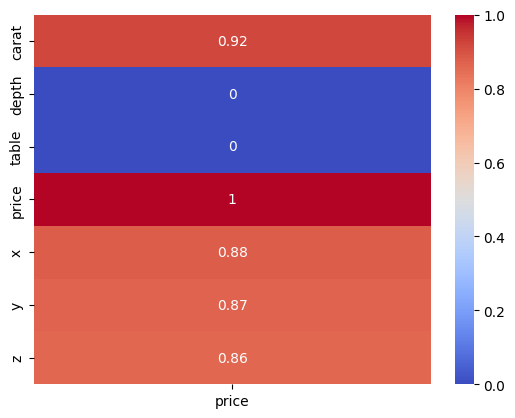

In [ ]:
corr_matrix = df.corr()[['price']]
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Выводы:


*   Выявлена зависимость между каратом бриллината и его ценой.
* Мы подтвердили утверждение, что цена бриллианта также зависит от цвета и чистоты. 

* Чем выше все эти показатели комплексно, тем дороже ценится бриллиант. Действительно, так и оценивается бриллиант
*   По таблице корреляции не было выявлено зависимости между глубиной и table алмаза и его ценой.